In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [57]:
# 第一步
forest_clf = RandomForestClassifier(random_state=42)
extra_tree_clf = ExtraTreesClassifier(random_state=42)
gbdt_clf = GradientBoostingClassifier(random_state=42)
ada_boost_clf = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=200,solver='newton-cg',n_jobs=-1,random_state=42),
                                   n_estimators=100,learning_rate=0.5,random_state=42)
svc_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

# 集成以上算法
clfs = [forest_clf,extra_tree_clf,gbdt_clf,ada_boost_clf,svc_clf,mlp_clf]

X_train_new = np.empty((len(X_train),len(clfs)))
for index,clf in enumerate(clfs):
    clf.fit(X_train, y_train)
    X_train_new[:,index] = clf.predict(X_train)
    print(f"f1 scores for {clf.__class__.__name__}: {f1_score(y_test, clf.predict(X_test), average='weighted')}")

f1 scores for RandomForestClassifier: 0.9867007700821758
f1 scores for ExtraTreesClassifier: 0.9888242439362629
f1 scores for GradientBoostingClassifier: 0.9756606160597092
f1 scores for AdaBoostClassifier: 0.9385439244282572
f1 scores for LinearSVC: 0.9535300033007191
f1 scores for MLPClassifier: 0.9844145551156823


In [58]:
X_train_new[:10], len(X_train_new)

(array([[4., 4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4., 4.],
        [2., 2., 2., 2., 2., 2.],
        [7., 7., 7., 7., 7., 7.],
        [4., 4., 4., 4., 4., 4.],
        [5., 5., 5., 5., 5., 5.],
        [6., 6., 6., 6., 6., 6.],
        [7., 7., 7., 7., 7., 7.],
        [3., 3., 3., 3., 3., 3.],
        [0., 0., 0., 0., 0., 0.]]),
 1347)

In [59]:
# 第二步
forest_clf = RandomForestClassifier(n_estimators=200,
                                    max_samples=1000,
                                    oob_score=True,
                                    random_state=42)
forest_clf.fit(X_train_new, y_train)

# 在测试集上的得分
X_test_new = np.empty((len(X_test),len(clfs)))
for index,clf in enumerate(clfs):
    X_test_new[:,index] = clf.predict(X_test)
    
y_pred = forest_clf.predict(X_test_new)
f1_score(y_test, y_pred, average='weighted')

0.9910446961686625

In [72]:
# 展示预测错的图片
pred_error_data = X_test[y_test != y_pred]
pred_error_real_label = y_test[y_test != y_pred]
pred_error_real_label

array([8, 5, 8, 8])

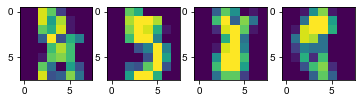

In [68]:
pred_error_image = pred_error_data.reshape(4,8,8)
count = 1
for image in pred_error_image:
    plt.subplot(1,len(pred_error_image),count)
    plt.imshow(image)
    count += 1